# Importing Libraries
Numpy, Pandas, Matplotlib(pyplot) and fbprophet (Facebook's API used for prediction and forecasts.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet as Prophet

data=pd.read_csv("/content/TM.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-22,117.989998,118.059998,117.120003,117.559998,117.559998,131800
1,2020-05-26,123.050003,124.360001,122.709999,124.110001,124.110001,378700
2,2020-05-27,126.410004,126.970001,124.839996,126.809998,126.809998,330200
3,2020-05-28,129.190002,129.320007,128.110001,128.360001,128.360001,341700
4,2020-05-29,125.940002,126.250000,124.709999,126.010002,126.010002,269100


# Visualization of the "Close" column.

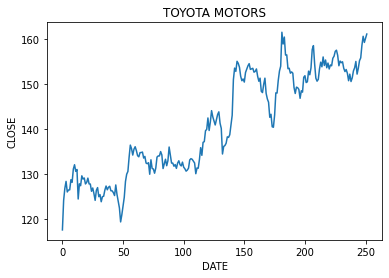

In [2]:
close=data['Close']
ax=close.plot(title="TOYOTA MOTORS")
ax.set_xlabel("DATE")
ax.set_ylabel("CLOSE")
plt.show()

We only need two columns from this dataset which are date and close.

In [3]:
data["Date"]=pd.to_datetime(data["Date"],infer_datetime_format=True)
data=data[["Date","Close"]]

We are using Facebook Prophet model,  for predicting the stock prices of Tesla

In [4]:
data=data.rename(columns={"Date":"ds","Close":"y"})

# Prediction

In [5]:
model=Prophet.Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2022-05-17,172.899630,148.540401,198.918174
613,2022-05-18,173.326673,147.704117,199.616297
614,2022-05-19,173.045340,146.461980,199.620292
615,2022-05-20,172.948790,146.856903,199.350016
616,2022-05-21,168.461659,142.018285,195.680222


# Visualizing the predicted model

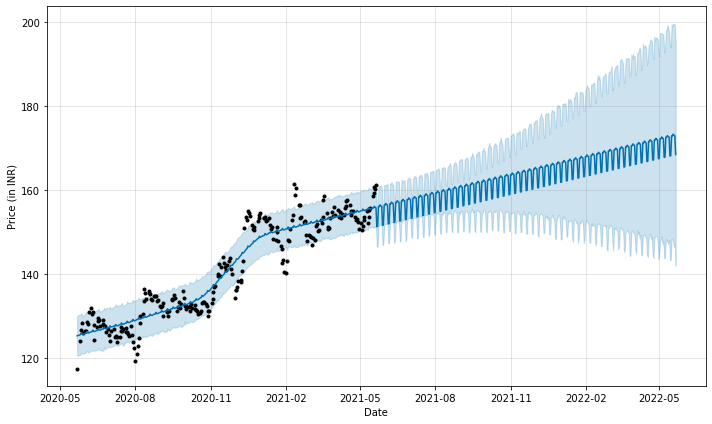

In [6]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price (in INR)")